# Amazon sales analysis


import libraries

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as rnd

load the dataset

In [309]:
df = pd.read_csv(r'C:\Users\SAMANVITHA\OneDrive\Desktop\numpy\Amazon Sale Report.csv')

In [310]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


understand the column

In [311]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

Sales Channel:	Indicates the platform/channel where the sale happened 

ship-service-level:	Shipping level/service type selected for delivery 

Category:	Product category (e.g., T-shirt, Shirt)

Size:   Size variant of the product sold (e.g., S, 3XL)

Courier Status:	Current shipping status of the order (e.g., On the Way, Shipped)

currency:	Currency in which the transaction occurred 

Amount:	Total amount paid by the customer

ship-city:	City where the product is being shipped

ship-state:	State of the shipping address

ship-postal-code:	Postal code (PIN) for the shipping address

ship-country:	Country of the shipping address 

B2B	Indicates: if the transaction is Business-to-Business (True/False)

fulfilled-by:	Who fulfills the order (e.g., Easy Ship, FBA, Merchant)


get the information about the dataset

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

to find the shape of the data set

In [313]:
df.shape

(128976, 21)

# data cleaning

drop unrelated/blank columns

In [314]:
df.drop(['New','PendingS'], axis=1, inplace=True)

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

checking null value 

In [316]:
pd.isnull(df).any()


index                 False
Order ID              False
Date                  False
Status                False
Fulfilment            False
Sales Channel         False
ship-service-level    False
Category              False
Size                  False
Courier Status        False
Qty                   False
currency               True
Amount                 True
ship-city              True
ship-state             True
ship-postal-code       True
ship-country           True
B2B                   False
fulfilled-by           True
dtype: bool

In [317]:
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [318]:
df.shape

(128976, 19)

In [319]:
df['Fulfilment'].value_counts()

Fulfilment
Amazon      89713
Merchant    39263
Name: count, dtype: int64

drop null values

In [320]:
df = df.dropna(subset=['Amount', 'currency','ship-city','ship-state','ship-postal-code','ship-country' ])

In [321]:
df['Fulfilment'].value_counts()

Fulfilment
Amazon      83629
Merchant    37514
Name: count, dtype: int64

In [322]:
df.shape

(121143, 19)

In [323]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

# Data transormation

change data type


In [324]:
df.loc[:,'ship-postal-code']=df['ship-postal-code'].astype('int')

In [325]:
df['Date']=pd.to_datetime (df['Date'],format='%d-%m-%Y',errors='coerce')

C:\Users\SAMANVITHA\AppData\Local\Temp\ipykernel_15032\1067449519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime (df['Date'],format='%d-%m-%Y',errors='coerce')


Checking whether the  data type change or not

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121143 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121143 non-null  int64         
 1   Order ID            121143 non-null  object        
 2   Date                51742 non-null   datetime64[ns]
 3   Status              121143 non-null  object        
 4   Fulfilment          121143 non-null  object        
 5   Sales Channel       121143 non-null  object        
 6   ship-service-level  121143 non-null  object        
 7   Category            121143 non-null  object        
 8   Size                121143 non-null  object        
 9   Courier Status      121143 non-null  object        
 10  Qty                 121143 non-null  int64         
 11  currency            121143 non-null  object        
 12  Amount              121143 non-null  float64       
 13  ship-city           121143 non-nul

In [327]:
df['ship-postal-code'].dtype

dtype('float64')

# data analysis

In [328]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

1.display top 5 rows

In [329]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,NaT,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,NaT,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,NaT,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,NaT,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,NaT,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


2.display last 5 rows

In [330]:
df.tail(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
128971,128970,406-6001380-7673107,NaT,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,128971,402-9551604-7544318,NaT,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,128972,407-9547469-3152358,NaT,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,128973,402-6184140-0545956,NaT,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN
128975,128974,408-7436540-8728312,NaT,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN


3.group the data of sales quantity based on size in a desending order

In [331]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
6,M,20113
5,L,19667
8,XL,18611
10,XXL,16217
7,S,15019
0,3XL,13341
9,XS,9835
4,Free,2051
3,6XL,687
2,5XL,512


4.count of B2B sales

In [332]:
df['B2B'].value_counts()


B2B
False    120299
True        844
Name: count, dtype: int64

5.count of fulfilments of orders from amazon and merchant

In [333]:
df['Fulfilment'].value_counts()

Fulfilment
Amazon      83629
Merchant    37514
Name: count, dtype: int64

6.which state have a high number of buyers

In [334]:
df['ship-state'].value_counts().head(1)

ship-state
MAHARASHTRA    21084
Name: count, dtype: int64

                                        ANALYSIS USING PLOTS

1.plot the graph on size

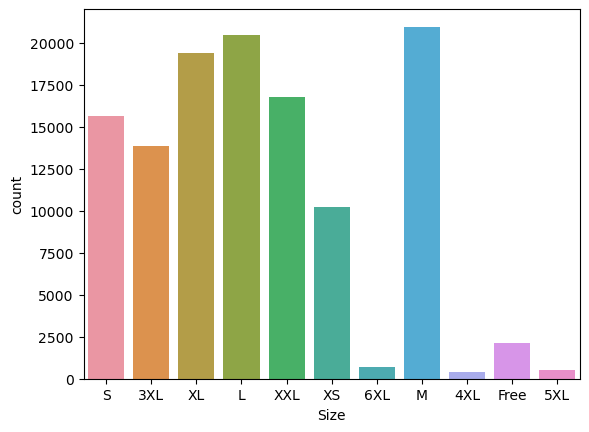

In [335]:
ax=sns.countplot(x='Size' ,data=df)

observation:

most of the people buys M-Size 

2.Plot the graph on grouping the data of sales quantity based on size in a desending order

<Axes: xlabel='Size', ylabel='Qty'>

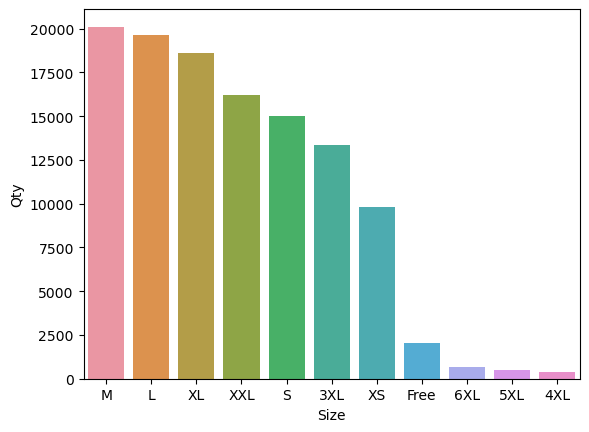

In [336]:
S_Qty=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

sns.barplot(x='Size',y='Qty', data=S_Qty)

observation:

 Most of the people buys M-Size in the sales 

3.plot the graph to know about the Courier Status 

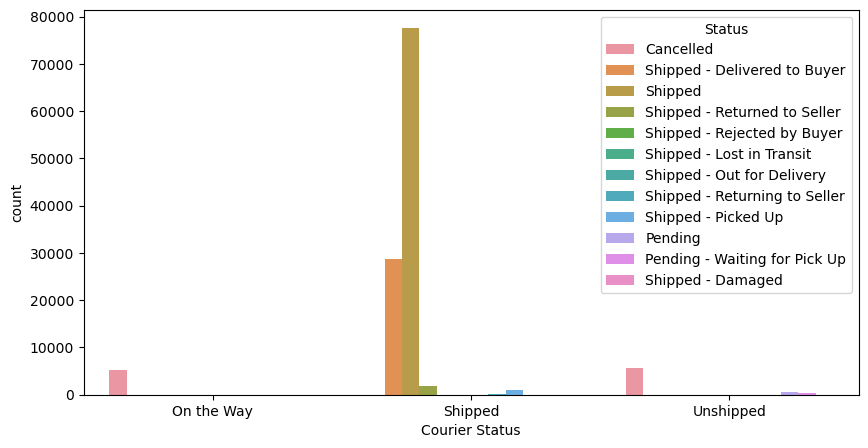

In [337]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df, x='Courier Status',hue= 'Status')
plt.show()

observation:

The majority of the orders are shipped through the courier

4.plot the graph to know which catogory does have the highest purchase

C:\Users\SAMANVITHA\AppData\Local\Temp\ipykernel_15032\3372996189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['Category'].astype(str)


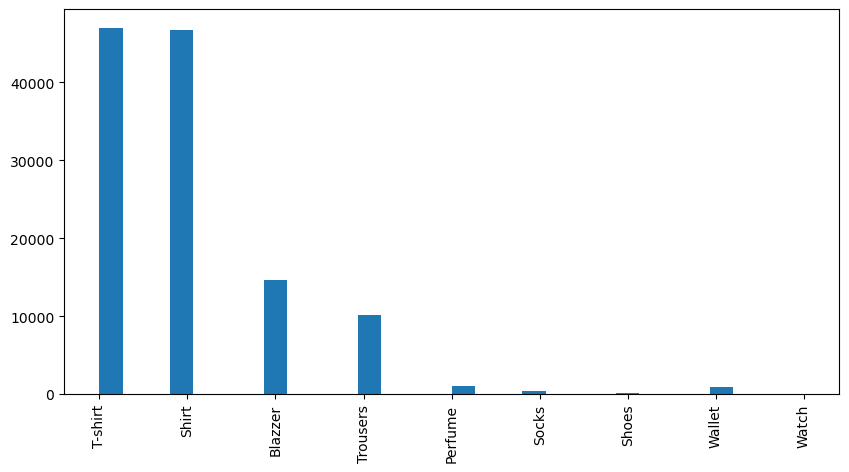

In [338]:
df['Category'] = df['Category'].astype(str)
column_data = df['Category']
plt.figure(figsize=(10, 5))
plt.hist(column_data, bins=30)
plt.xticks(rotation=90)
plt.show()

observation:

The most of the  buyers buys T-shirt 

In [339]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

5.plot the graph to Check B2B Data  by using pie chart 

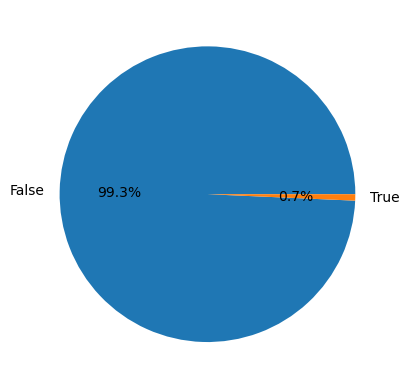

In [340]:
B2B_Check = df['B2B'].value_counts()
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

observation:

The maximum i.e. 99.3% of buyers are retailers and 0.7% are B2B buyers

6.plot the graph to know the Fulfullment rate of amazon and merchents

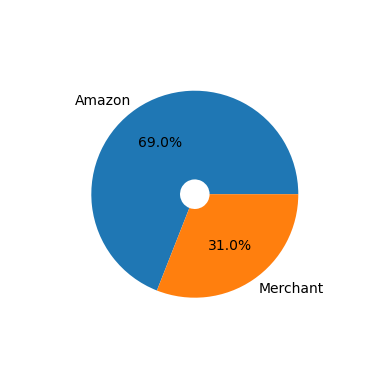

In [341]:

a1=df['Fulfilment'].value_counts()
# Step 4: Plot the pie chart
fig, ax = plt.subplots()

ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()


observation:

 the Fulfilment rate of amazon is high

7.plot a graph of top_10_States with high buyers

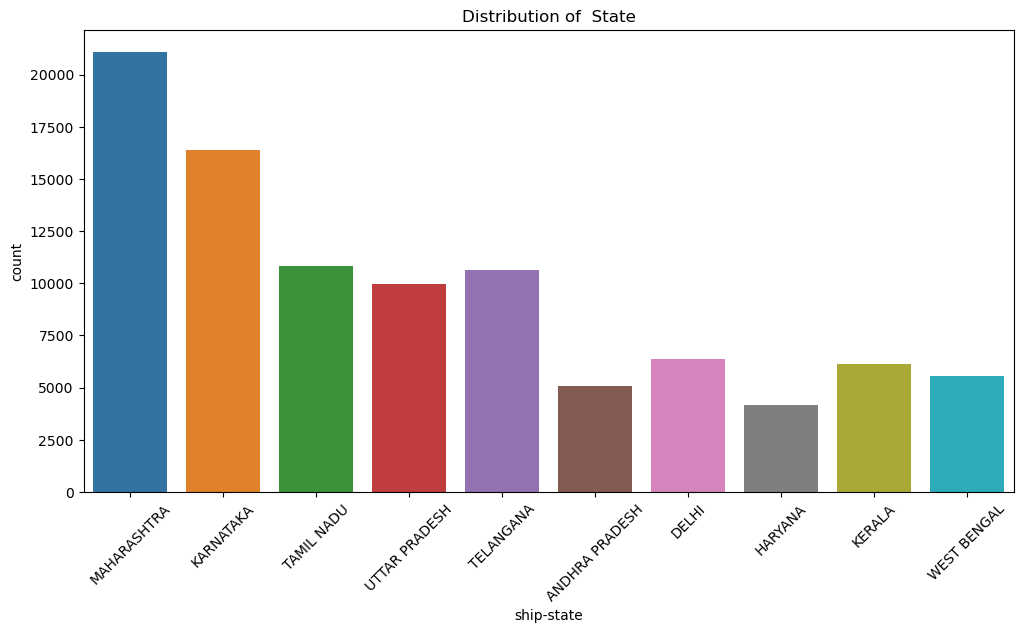

In [342]:

top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

observation:

The most of the buyers are from Maharashtra state and Karnataka


                                                 Final Analysis

-->The data analysis reveals that the business has a significant customer base in Maharashtra state and KARNATAKA.

-->business mainly serves retailers.

-->fulfills orders through Amazon.

-->experiences a high demand for T-shirts

-->M-Size is preferred choice among buyers.